In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt
# from IPython import display

import grafica as gr
# Ajustar el tamaño predeterminado de las figuras
plt.rcParams['figure.figsize'] = [4,3]

In [3]:
# Ejemplos de entrada de la función AND
X = np.array([[0,0], 
              [0,1],
              [1,0],
              [1,1]])
CantEjemplos = X.shape[0]
X = 2 * X - 1

#-- Respuesta esperada para cada ejemplo
T = np.array([0,0,0,1])
#T = 2*T-1

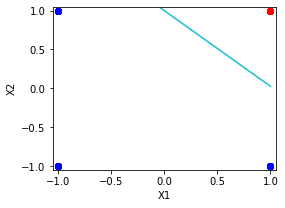

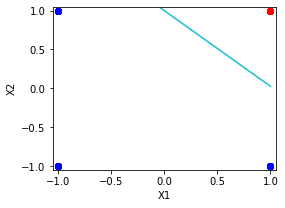

In [4]:
# --- titulos y ph se utilizan sólo para dibujar ---
titulos = ['X1', 'X2']
ph=0

#--- Los pesos iniciales son aleatorios
W = np.array(np.random.uniform(-0.5, 0.5, size=2))
b = np.random.uniform(-0.5, 0.5)

#--- al finalizar ERRORES debe contener la cantidad de cambios realizados en c/iteración ---
errores = []

#--- parámetros del PERCEPTRON ---
MAX_ITE = 40
alfa = 0.25
COTA = 10e-6

# --- Entrenamiento del PERCEPTRON ---
ite = 0
ErrorAVG = 1
Error_ant = 0
errores = []
while (ite < MAX_ITE) and ( np.abs(ErrorAVG-Error_ant)>COTA):
    Error_ant = ErrorAVG
    suma = 0
    for e in range(CantEjemplos):
        neta = W[0]*X[e,0] + W[1]*X[e,1] + b
        
        y = 1/(1+ np.exp(-neta))
        deriv = y * (1-y)
        
        Error = T[e]-y
                
        W[0]= W[0]+ alfa * Error *  deriv * X[e,0]
        W[1]= W[1]+ alfa * Error *  deriv * X[e,1]
        b = b + alfa * Error * deriv
        
        suma = suma + Error*Error
        
    ErrorAVG = suma / CantEjemplos    
    
    errores.append(ErrorAVG)
    
    # dibujar nuevamente la recta            
    ph = gr.dibuPtosRecta(X,T, W, b, titulos, ph) 
    ite = ite+1
      

In [5]:
print(W)
print(b)

[1.03130292 1.0568097 ]
-1.0579105585975503


In [6]:
print(X)
print(T)

[[-1 -1]
 [-1  1]
 [ 1 -1]
 [ 1  1]]
[0 0 0 1]


In [8]:
netas = W @ X.T+b
y = 1 / (1+ np.exp(-netas))
print(netas)
print(y)

[-3.14602319 -1.03240378 -1.08341734  1.03020207]
[0.04124826 0.26261835 0.25285986 0.73695507]


In [7]:
netas = np.dot(W, X.T)+b
y = 1 / (1+ np.exp(-netas))
print(netas)
print(y)

[-3.14602319 -1.03240378 -1.08341734  1.03020207]
[0.04124826 0.26261835 0.25285986 0.73695507]


<Figure size 288x216 with 0 Axes>

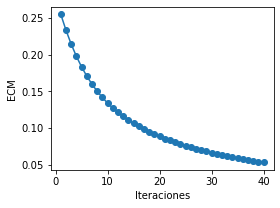

In [9]:
plt.clf()
plt.figure()
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()